In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable
%matplotlib widget

import importlib
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf


In [222]:
importlib.reload(ExperimentClass)
importlib.reload(tools)
importlib.reload(mf)

<module 'math_functions' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\math_functions.py'>

In [223]:
list_path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/00_experiments_lists/"
exp_list = pd.read_csv(list_path + "Pigments_list.csv", sep=";", decimal=",")
exp_list

,Name,Control_sample_label,Light_sample_label,Background,Strain,Strain_label,Time_start,Date,Cell_count_mL,Harvested_vol_mL,Light_sample_vol_mL,Control_harvested_vol_mL,DTT_time,Replicate,Comment
0,20241118_DTT_Pt1_1,R2 Pt1-1 t0,R2 Pt1-1 5 min,Pt1,1.0,WT,16.0,18/11/2024,2120000.0,1.7,2.5,3.0,5.1,2.0,NaN
1,20241119_DTT_Pt1_26,R2 Pt1-26 t0,R2 Pt1-26 5 min,Pt1,26.0,ZEP3 - -,17.0,19/11/2024,2150000.0,1.7,2.5,3.0,5.1,2.0,NaN
2,20241120_DTT_Pt1_27,R2 Pt1-27 t0,R2 Pt1-27 5 min,Pt1,27.0,ZEP3 + +,16.0,20/11/2024,2160000.0,1.5,2.5,3.0,5.1,2.0,NaN
3,20241121_DTT_Pt1-43,R2 Pt1-43 t0,R2 Pt1-43 5 min,Pt1,43.0,ZEP3 +,16.0,21/11/2024,1820000.0,2.0,2.5,3.0,5.1,2.0,NaN
4,20241125_DTT_Pt1-3,R2 Pt1-3 t0,R2 Pt1-3 5 min,Pt1,3.0,VDE KO,16.0,25/11/2024,1940000.0,2.0,2.5,3.0,5.1,2.0,"Maybe sampled 2 instead of 3 for control, not ..."
5,20241126_DTT_Pt1-11,R2 Pt1-11 t0,R1 Pt1-11 5 min,Pt1,11.0,VDE + +,16.0,26/11/2024,1680000.0,2.1,2.5,3.0,5.1,2.0,NaN
6,20241127_DTT_Pt1-1,R3 Pt1-1 t0,R3 Pt1-1 5 min,Pt1,1.0,WT,16.0,27/11/2024,1570000.0,2.0,2.5,3.0,5.1,3.0,NaN
7,20241128_DTT_Pt1-3,R3 Pt1-3 t0,R3 Pt1-3 5 min,Pt1,3.0,VDE KO,16.0,28/11/2024,1690000.0,2.4,2.5,3.0,5.1,3.0,PSI signal jumped at 817 s
8,20241129_DTT_Pt1-1,R4 Pt1-1 t0,R4 Pt1-1 5 min,Pt1,1.0,WT,16.0,29/11/2024,1600000.0,2.0,2.5,3.0,5.1,4.0,NaN
9,20241130_DTT_Pt1-26,R3 Pt1-26 t0,R3 Pt1-26 5 min,Pt1,26.0,ZEP3 - -,16.0,30/11/2024,1760000.0,2.4,2.5,3.0,5.1,3.0,NaN


In [224]:
exp_list[exp_list["Name"] == name].index.values[0]

2

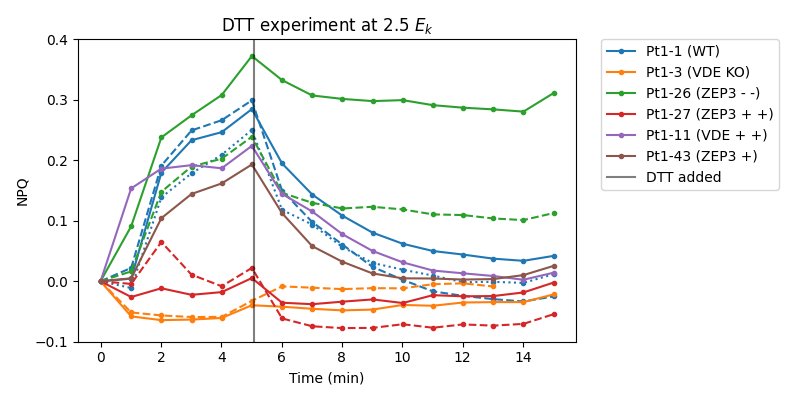

In [235]:
marker = 3
alpha = 0.7

strains = [1, 3, 26, 27, 11, 43]
fmts = ["-o", "--o", ":o"]
labels = []

fig, ax = plt.subplots(figsize=(8, 4))
for i, strain in enumerate(strains):
    names = exp_list[exp_list["Strain"] == strain]["Name"].to_list()
    for j, name in enumerate(names):
        i_list = exp_list[exp_list["Name"] == name].index.values[0]
        path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/params.csv"
        params = pd.read_csv(path, index_col= False, sep=";")
        time = (params["Time"].to_numpy() - params["Time"].to_numpy()[0])/60
        NPQ = params["NPQ"].to_numpy()
        ax.plot(time, NPQ, fmts[j], color = f"C{i}", markersize = marker)
    ax.plot([], [], "-o", color = f"C{i}", markersize = marker, label = f"Pt1-{strain} ({exp_list.iloc[i_list]['Strain_label']})")

ax.axvline(x= 5.1, color = 'k', linestyle = '-', label = 'DTT added', alpha = 0.5) 
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xlabel("Time (min)")
ax.set_ylabel("NPQ")
ax.set_title("DTT experiment at 2.5 $E_k$")
ax.set_ylim(-0.1, 0.4)
fig.tight_layout()


Text(0.5, 1.0, 'DTT experiment at 2.5 $E_k$')

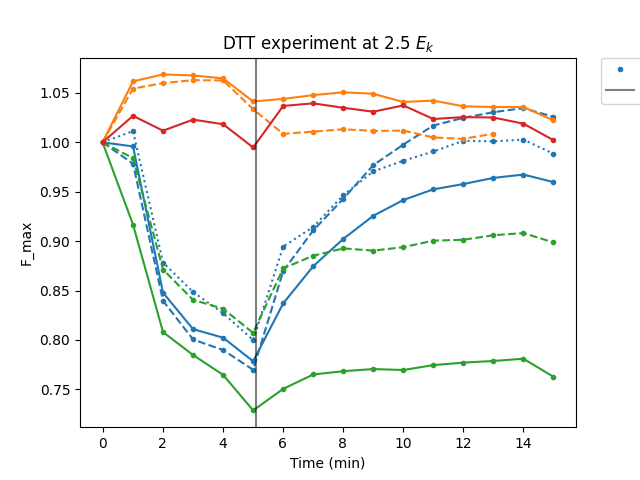

In [220]:
marker = 3
alpha = 0.7

strains = [1, 3, 26, 27]
fmts = ["-o", "--o", ":o"]
labels = []

fig, ax = plt.subplots()
for i, strain in enumerate(strains):
    names = exp_list[exp_list["Strain"] == strain]["Name"].to_list()
    for j, name in enumerate(names):
        i_list = exp_list[exp_list["Name"] == name].index.values[0]
        path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/params.csv"
        params = pd.read_csv(path, index_col= False, sep=";")
        time = (params["Time"].to_numpy() - params["Time"].to_numpy()[0])/60
        F_max = params["F_max"].to_numpy()
        ax.plot(time, F_max, fmts[j], color = f"C{i}", markersize = marker)

ax.plot([], [], "o", color = "C0", markersize = marker, label = "WT")
ax.axvline(x= 5.1, color = 'k', linestyle = '-', label = 'DTT added', alpha = 0.5) 
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xlabel("Time (min)")
ax.set_ylabel("F_max")
ax.set_title("DTT experiment at 2.5 $E_k$")
#ax.set_ylim(-0.1, 0.4)


In [166]:
experiments = []
for i in exp_list.index:
    exp = ExperimentClass.Experiment(exp_list.Name[i],"PSI", DataType=".csv", sep = ';')
    experiments.append(exp)

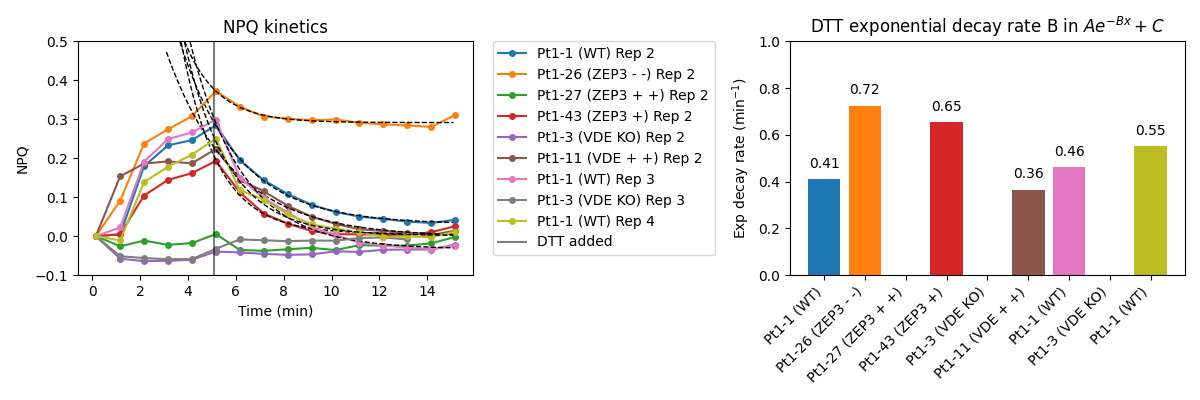

In [170]:
importlib.reload(tools)
start_fit = 5
rates = []
colors = []

fig, ax = plt.subplots(1, 2, figsize = (12,4))
for j, manip in enumerate(experiments):
    i = manip.records.index('DTT')
    ax[0].plot(times_Fmax[j][i]/60, NPQ[j][i], 'o-', 
               label = f"{exp_list.Background[j]}-{exp_list.Strain[j]} ({exp_list.Strain_label[j]}) Rep {exp_list.Replicate[j]}", 
               markersize = 4, color = f"C{j}")
    colors.append(f"C{j}")
    if exp_list.Strain[j] not in(27, 3):
        x_data = np.array(times_Fmax[j][i])[start_fit:]/60 - exp_list.DTT_time[j]
        y_data = np.array(NPQ[j][i][start_fit:])
        popt, xfit, yfit = tools.mono_exponential_fit(x_data, y_data, -2, 10, 100)
        ax[0].plot(xfit + exp_list.DTT_time[j], yfit, 'k--', linewidth = 1)
        rates.append(popt[1])
    else:
        rates.append(np.nan)    

    
ax[0].axvline(x= exp_list.DTT_time[j], color = 'k', linestyle = '-', label = 'DTT added', alpha = 0.5) 
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax[0].set_xlabel("Time (min)")
ax[0].set_ylabel("NPQ")
ax[0].set_title(f"NPQ kinetics")
ax[0].set_ylim(-0.1, 0.5)

bars = ax[1].bar(np.arange(len(rates)), rates, color = colors)
for i, bar in enumerate(bars):
    if ~np.isnan(rates[i]):
        ax[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, f"{rates[i]:.2f}", ha = 'center')
ax[1].set_xticks(np.arange(len(rates)))
ax[1].set_xticklabels([f"{exp_list.Background[j]}-{exp_list.Strain[j]} ({exp_list.Strain_label[j]})" for j in range(len(rates))], rotation = 45, ha = 'right')
ax[1].set_ylabel("Exp decay rate (min$^{-1}$)")
ax[1].set_title(f"DTT exponential decay rate B in " + "$Ae^{-Bx}+C$")
ax[1].set_ylim(0, 1)

fig.tight_layout()


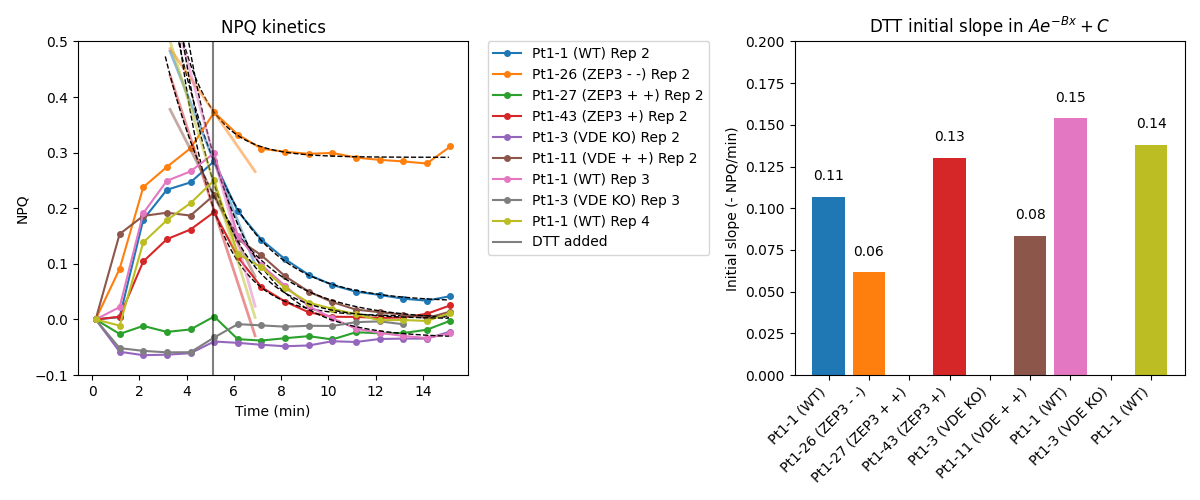

In [171]:
importlib.reload(tools)
start_fit = 5
slopes = []
colors = []

fig, ax = plt.subplots(1, 2, figsize = (12,5))
for j, manip in enumerate(experiments):
    i = manip.records.index('DTT')
    ax[0].plot(times_Fmax[j][i]/60, NPQ[j][i], 'o-', 
               label = f"{exp_list.Background[j]}-{exp_list.Strain[j]} ({exp_list.Strain_label[j]}) Rep {exp_list.Replicate[j]}", 
               markersize = 4, color = f"C{j}")
    colors.append(f"C{j}")
    if exp_list.Strain[j] not in(27, 3):
        x_data = np.array(times_Fmax[j][i])[start_fit:]/60 - exp_list.DTT_time[j]
        y_data = np.array(NPQ[j][i][start_fit:])
        popt, xfit, yfit = tools.mono_exponential_fit(x_data, y_data, -2, 10, 100)
        ax[0].plot(xfit + exp_list.DTT_time[j], yfit, 'k--', linewidth = 1)
        slopes.append(popt[1]*popt[0])
        x_slope = np.linspace(-1.8, 1.8, 10)
        y_slope = -popt[1]*popt[0]*x_slope + popt[2] + popt[0]
        ax[0].plot(x_slope + exp_list.DTT_time[j], y_slope, color = colors[j], linewidth = 2, alpha = 0.5)
          
    else:
        slopes.append(np.nan)    

    
ax[0].axvline(x= exp_list.DTT_time[j], color = 'k', linestyle = '-', label = 'DTT added', alpha = 0.5) 
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax[0].set_xlabel("Time (min)")
ax[0].set_ylabel("NPQ")
ax[0].set_title(f"NPQ kinetics")
ax[0].set_ylim(-0.1, 0.5)

bars = ax[1].bar(np.arange(len(slopes)), slopes, color = colors)
for i, bar in enumerate(bars):
    if ~np.isnan(slopes[i]):
        ax[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f"{slopes[i]:.2f}", ha = 'center')
ax[1].set_xticks(np.arange(len(slopes)))
ax[1].set_xticklabels([f"{exp_list.Background[j]}-{exp_list.Strain[j]} ({exp_list.Strain_label[j]})" for j in range(len(slopes))], rotation = 45, ha = 'right')
ax[1].set_ylabel("Initial slope (- NPQ/min)")
ax[1].set_title(f"DTT initial slope in " + "$Ae^{-Bx}+C$")
ax[1].set_ylim(0, 0.2)

fig.tight_layout()


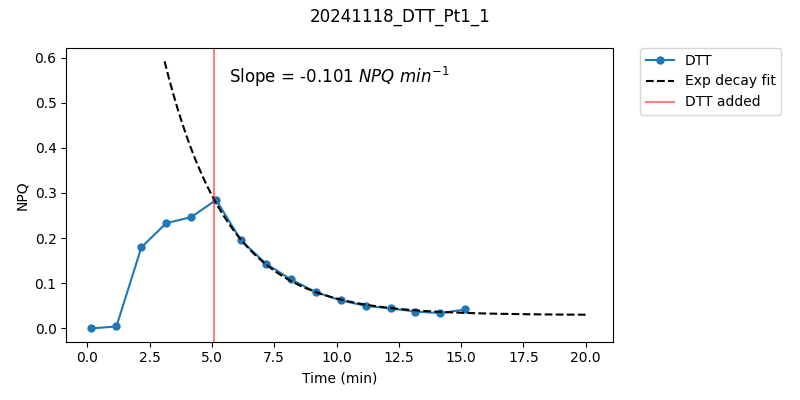

In [65]:
name = "20241118_DTT_Pt1_1"

exp_index = exp_list[exp_list.Name == name].index[0]

exp = ExperimentClass.Experiment(name,"PSI", DataType=".csv", sep = ';')

times_Fmax, F_max, F_stat, NPQ, phi_stat = compute_params(exp)

start_fit = 6

fig, ax = plt.subplots(figsize = (8,4))
fig.suptitle(f"{name}")
for i, k in enumerate(exp.records):
    if "DTT" in k:
        ax.plot(times_Fmax[i]/60, NPQ[i], 'o-',label = k, markersize = 5)
        xdata = times_Fmax[i][start_fit:]/60 - exp_list.DTT_time[exp_index]
        ydata = NPQ[i][start_fit:]
        popt, xfit, yfit = tools.exp_decay_fit(xdata, ydata, -2, 15, 100, p0 = [-0 ,  2,  0.25])
        ax.plot(xfit + exp_list.DTT_time[exp_index], yfit, 'k--', label = "Exp decay fit")
        slope = popt[0]/popt[1]
    

ax.text(0.5, 0.9, f"Slope = {slope:.3f} $NPQ$ $min^{{-1}}$", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize = 12)
ax.axvline(x= exp_list.DTT_time[exp_index], color = 'red', linestyle = '-', label = 'DTT added', alpha = 0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xlabel("Time (min)")
ax.set_ylabel("NPQ")
fig.tight_layout()
    







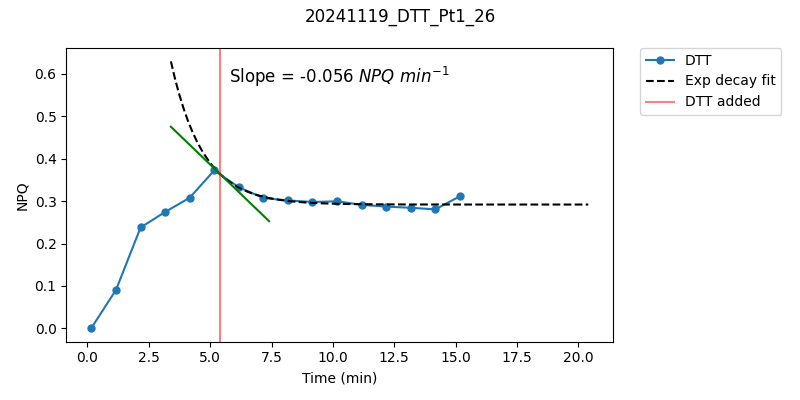

In [100]:
name = "20241119_DTT_Pt1_26"

exp_index = exp_list[exp_list.Name == name].index[0]

exp = ExperimentClass.Experiment(name,"PSI", DataType=".csv", sep = ';')

times_Fmax, F_max, F_stat, NPQ, phi_stat = compute_params(exp)

start_fit = 6

fig, ax = plt.subplots(figsize = (8,4))
fig.suptitle(f"{name}")
for i, k in enumerate(exp.records[::-1]):
    if "DTT" in k:
        ax.plot(times_Fmax[i]/60, NPQ[i], 'o-',label = k, markersize = 5)
        xdata = times_Fmax[i][start_fit:]/60 - exp_list.DTT_time[exp_index]
        ydata = NPQ[i][start_fit:]
        popt, xfit, yfit = tools.exp_decay_fit(xdata, ydata, -2, 15, 100, p0 = [-0 ,  2,  0.25])
        ax.plot(xfit + exp_list.DTT_time[exp_index], yfit, 'k--', label = "Exp decay fit")
        slope = popt[0]/popt[1]
        x_slope = np.linspace(-2, 2, 10)
        y_slope = slope*x_slope + popt[2]
        ax.plot(x_slope + exp_list.DTT_time[exp_index], y_slope, 'green')
    

ax.text(0.5, 0.9, f"Slope = {slope:.3f} $NPQ$ $min^{{-1}}$", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize = 12)
ax.axvline(x= exp_list.DTT_time[exp_index], color = 'red', linestyle = '-', label = 'DTT added', alpha = 0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xlabel("Time (min)")
ax.set_ylabel("NPQ")
fig.tight_layout()
    






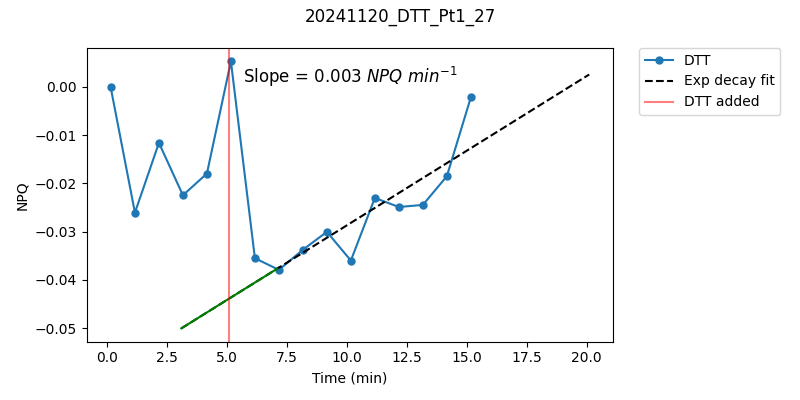

In [11]:
name = "20241120_DTT_Pt1_27"

exp_index = exp_list[exp_list.Name == name].index[0]

exp = ExperimentClass.Experiment(name,"PSI", DataType=".csv", sep = ';')

times_Fmax, F_max, F_stat, NPQ, phi_stat = compute_params(exp)

start_fit = 6

fig, ax = plt.subplots(figsize = (8,4))
fig.suptitle(f"{name}")
for i, k in enumerate(exp.records[::-1]):
    if "DTT" in k:
        ax.plot(times_Fmax[i]/60, NPQ[i], 'o-',label = k, markersize = 5)
        xdata = times_Fmax[i][start_fit:]/60 - exp_list.DTT_time[exp_index]
        ydata = NPQ[i][start_fit:]
        popt, xfit, yfit = tools.exp_decay_fit(xdata, ydata, -2, 15, 100, p0 = [-0 ,  2,  0.25])
        ax.plot(xfit + exp_list.DTT_time[exp_index], yfit, 'k--', label = "Exp decay fit")
        slope = popt[0]/popt[1]
        x_slope = np.linspace(-2, 2, 10)
        y_slope = slope*x_slope + popt[2]
        ax.plot(x_slope + exp_list.DTT_time[exp_index], y_slope, 'green')
    

ax.text(0.5, 0.9, f"Slope = {slope:.3f} $NPQ$ $min^{{-1}}$", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize = 12)
ax.axvline(x= exp_list.DTT_time[exp_index], color = 'red', linestyle = '-', label = 'DTT added', alpha = 0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xlabel("Time (min)")
ax.set_ylabel("NPQ")
fig.tight_layout()
    


C:\Users\Orlando\AppData\Local\Temp\ipykernel_5156\3974825954.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize = (8,4))


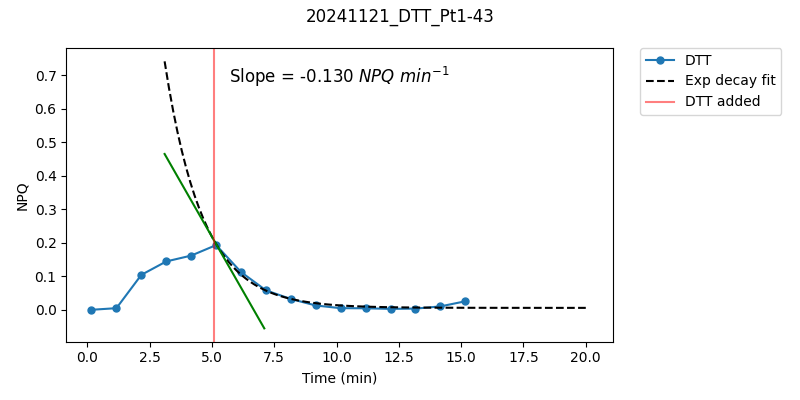

In [13]:
name = "20241121_DTT_Pt1-43"

exp_index = exp_list[exp_list.Name == name].index[0]

exp = ExperimentClass.Experiment(name,"PSI", DataType=".csv", sep = ';')

times_Fmax, F_max, F_stat, NPQ, phi_stat = compute_params(exp)

start_fit = 5

fig, ax = plt.subplots(figsize = (8,4))
fig.suptitle(f"{name}")
for i, k in enumerate(exp.records[::-1]):
    if "DTT" in k:
        ax.plot(times_Fmax[i]/60, NPQ[i], 'o-',label = k, markersize = 5)
        xdata = times_Fmax[i][start_fit:]/60 - exp_list.DTT_time[exp_index]
        ydata = NPQ[i][start_fit:]
        popt, xfit, yfit = tools.exp_decay_fit(xdata, ydata, -2, 15, 100, p0 = [-0 ,  2,  0.25])
        ax.plot(xfit + exp_list.DTT_time[exp_index], yfit, 'k--', label = "Exp decay fit")
        slope = popt[0]/popt[1]
        x_slope = np.linspace(-2, 2, 10)
        y_slope = slope*x_slope + popt[2]
        ax.plot(x_slope + exp_list.DTT_time[exp_index], y_slope, 'green')
    

ax.text(0.5, 0.9, f"Slope = {slope:.3f} $NPQ$ $min^{{-1}}$", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize = 12)
ax.axvline(x= exp_list.DTT_time[exp_index], color = 'red', linestyle = '-', label = 'DTT added', alpha = 0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xlabel("Time (min)")
ax.set_ylabel("NPQ")
fig.tight_layout()
    
